In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/kaggle/input/purchase-data/train.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
data.shape

(550068, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [10]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+','4')

In [11]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)

In [12]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 50.4+ MB


In [14]:
data.shape

(550068, 12)

In [15]:
for col in data.columns:
    if data[col].dtypes == object:
        data[col] = le.fit_transform(data[col])
        print(col,le.classes_)

Product_ID ['P00000142' 'P00000242' 'P00000342' ... 'P0099742' 'P0099842' 'P0099942']
Gender ['F' 'M']
Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
City_Category ['A' 'B' 'C']


In [16]:
data.dropna(inplace = True)

In [17]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0,15200
6,1000004,1745,1,4,7,1,2,1,1,8.0,17.0,19215
13,1000005,1355,1,2,20,0,1,1,1,2.0,5.0,15665
14,1000006,2203,0,5,9,0,1,0,5,8.0,14.0,5378
16,1000006,3598,0,5,9,0,1,0,2,3.0,4.0,13055


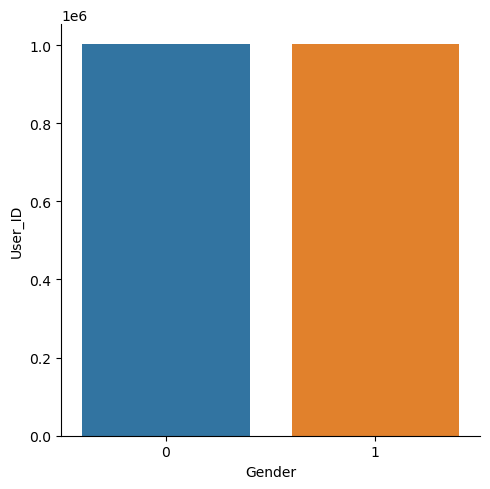

In [18]:
sns.catplot(data = data, x = "Gender",y="User_ID",kind="bar")

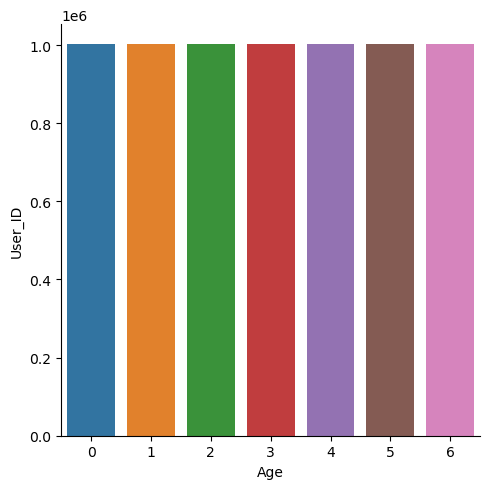

In [19]:
sns.catplot(data = data, x = "Age",y="User_ID",kind="bar")

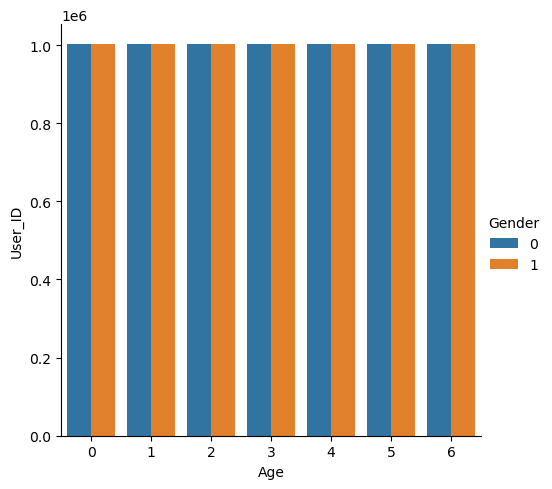

In [20]:
sns.catplot(data = data, x = "Age",y="User_ID",hue = "Gender",kind="bar")

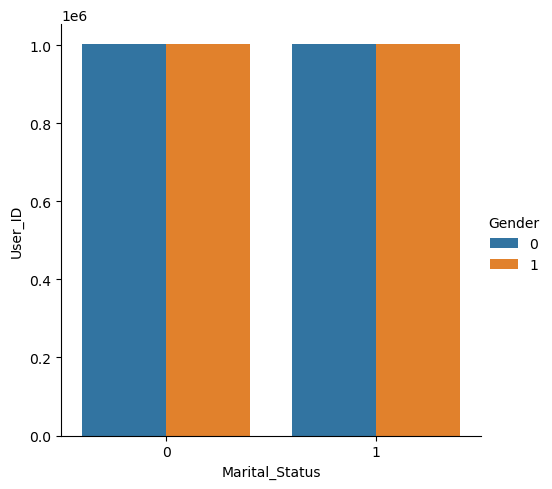

In [21]:
sns.catplot(data = data, x = "Marital_Status",y="User_ID",hue = "Gender",kind="bar")

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

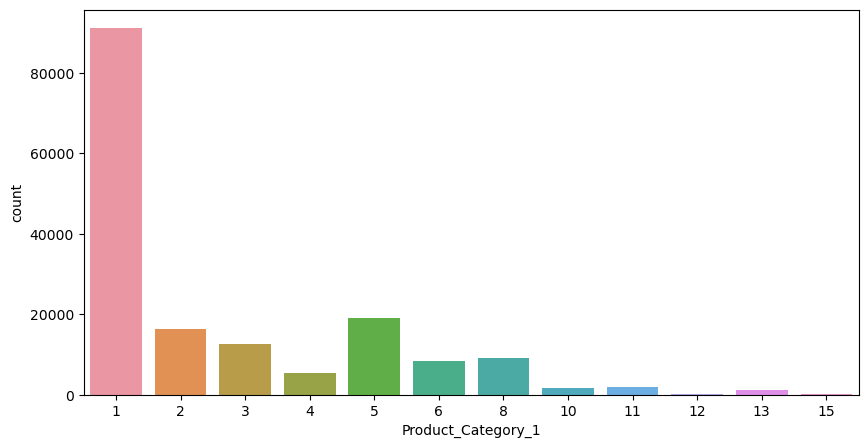

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(data = data, x = "Product_Category_1")

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

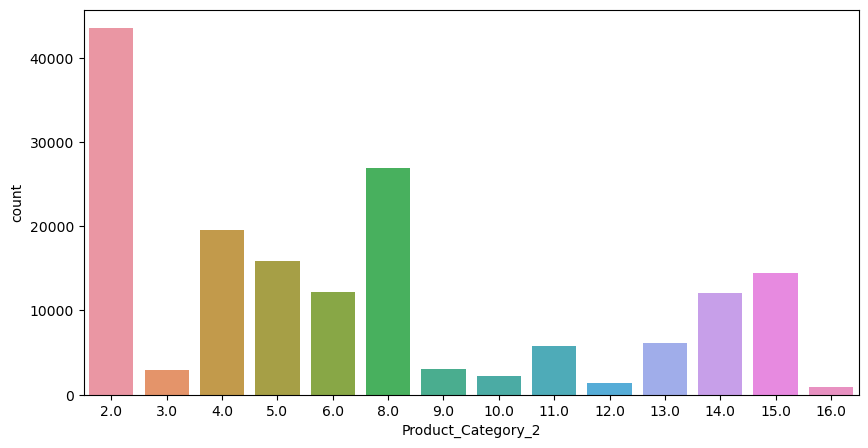

In [23]:
plt.figure(figsize = (10,5))
sns.countplot(data = data, x = "Product_Category_2")

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

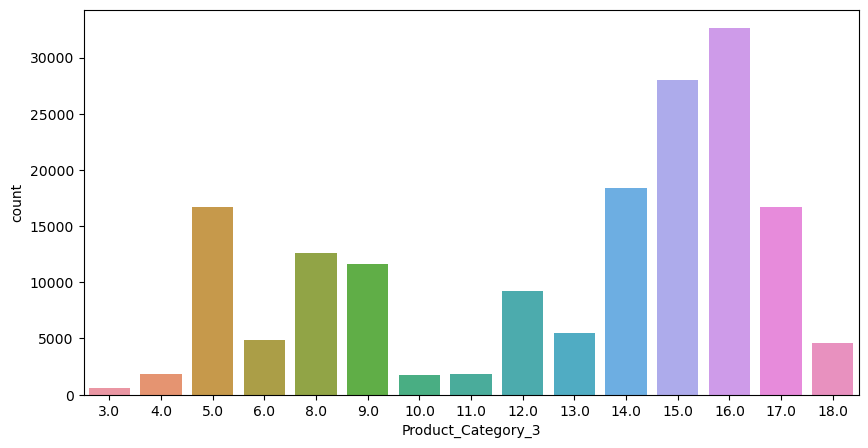

In [24]:
plt.figure(figsize = (10,5))
sns.countplot(data = data, x = "Product_Category_3")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

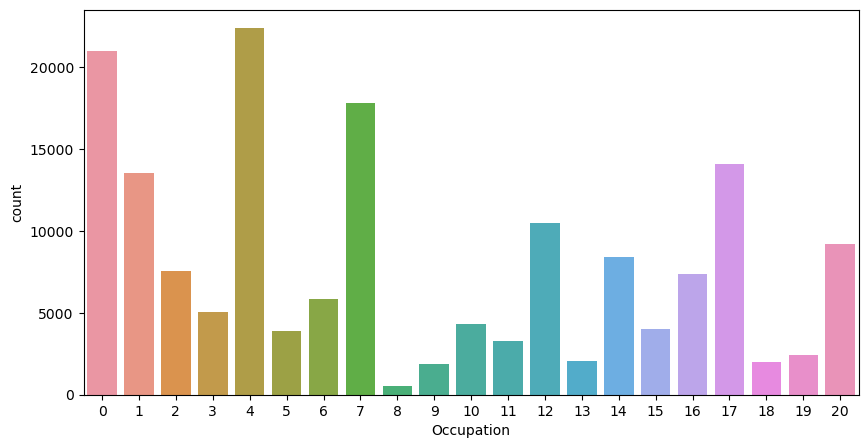

In [25]:
plt.figure(figsize = (10,5))
sns.countplot(data = data, x = "Occupation")

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

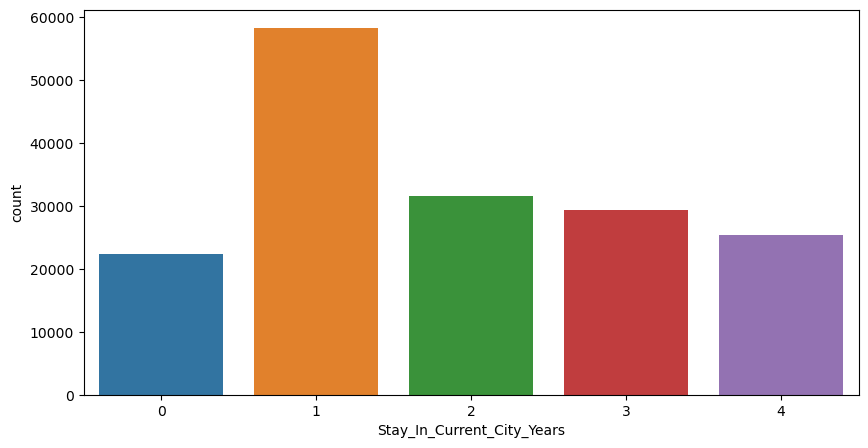

In [26]:
plt.figure(figsize = (10,5))
sns.countplot(data = data, x = "Stay_In_Current_City_Years")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

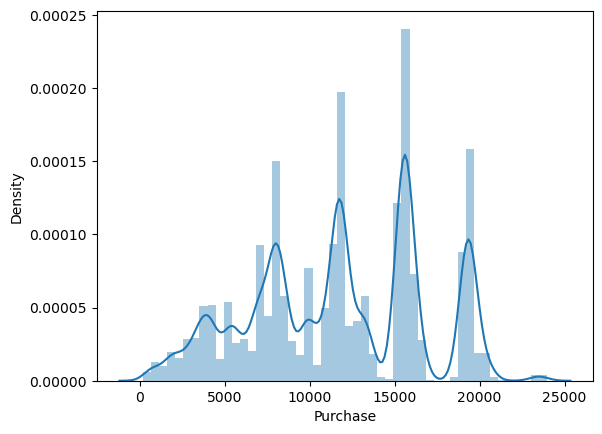

In [27]:
sns.distplot(data['Purchase'])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  int64  
 2   Gender                      166821 non-null  int64  
 3   Age                         166821 non-null  int64  
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  int64  
 6   Stay_In_Current_City_Years  166821 non-null  int64  
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 20.6 MB


In [29]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0,15200
6,1000004,1745,1,4,7,1,2,1,1,8.0,17.0,19215
13,1000005,1355,1,2,20,0,1,1,1,2.0,5.0,15665
14,1000006,2203,0,5,9,0,1,0,5,8.0,14.0,5378
16,1000006,3598,0,5,9,0,1,0,2,3.0,4.0,13055


<AxesSubplot:>

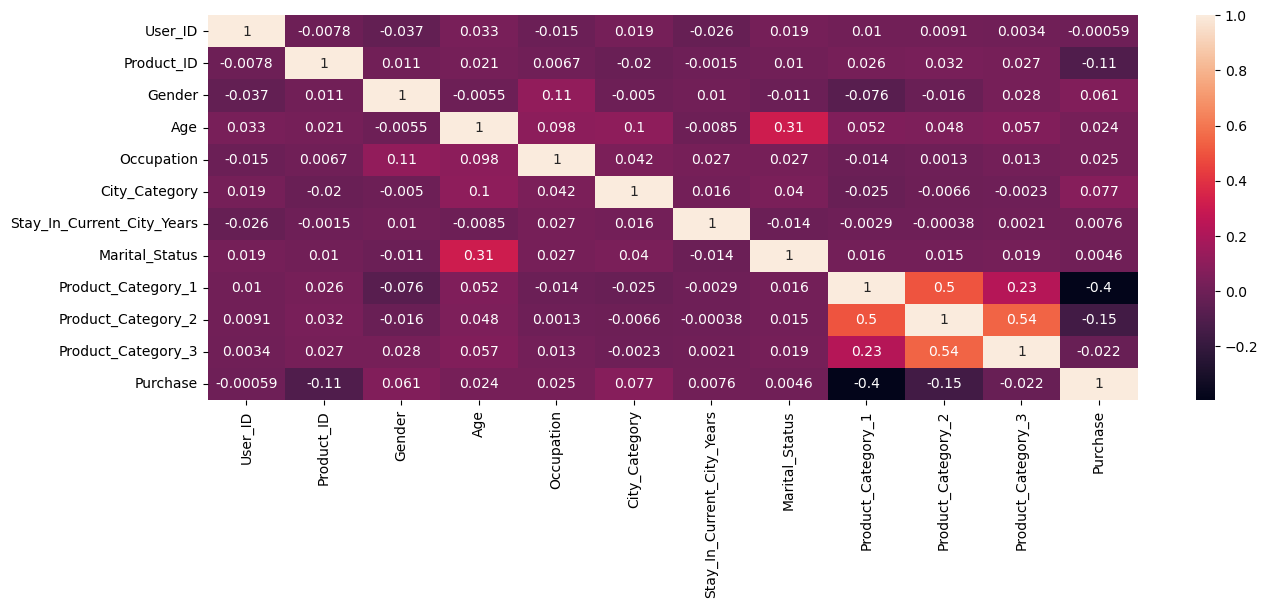

In [30]:
corr = data.corr()
plt.figure(figsize = (15,5))
sns.heatmap(corr,annot = True)

In [31]:
corr['Purchase'].sort_values(ascending = False)

Purchase                      1.000000
City_Category                 0.077344
Gender                        0.060852
Occupation                    0.025048
Age                           0.023937
Stay_In_Current_City_Years    0.007598
Marital_Status                0.004603
User_ID                      -0.000590
Product_Category_3           -0.022006
Product_ID                   -0.106410
Product_Category_2           -0.153711
Product_Category_1           -0.396558
Name: Purchase, dtype: float64

In [32]:
data.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.668210e+05,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000
mean,1.003037e+06,1471.491683,0.774645,2.455153,8.178886,1.087159,1.861690,0.402839,2.742766,6.896871,12.668243,11658.114980
std,1.732907e+03,942.668323,0.417817,1.335119,6.487522,0.759824,1.284791,0.490470,2.573969,4.500288,4.125338,5082.287959
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001523e+06,745.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,9.000000,7869.000000
50%,1.003101e+06,1334.000000,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,1.000000,6.000000,14.000000,11756.000000
75%,1.004480e+06,2106.000000,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,4.000000,10.000000,16.000000,15626.000000
max,1.006040e+06,3630.000000,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,15.000000,16.000000,18.000000,23959.000000


In [33]:
data.groupby('Age')['Purchase'].mean()

Age
0    11172.358711
1    11580.858539
2    11612.248065
3    11729.364398
4    11663.978017
5    12035.504299
6    11861.524638
Name: Purchase, dtype: float64

Let's check whether the mean purchase of age group 18-25 is 10000

In [34]:
new_data = data.loc[(data['Age'] == 1) & (data['Gender'] == 1)]

In [35]:
new_data.shape

(24239, 12)

In [36]:
sample_size = 1000
sample = new_data.sample(sample_size,random_state = 44)

In [37]:
sample.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
161710,1001035,780,1,1,2,2,1,1,1,6.0,8.0,19252
423459,1005167,838,1,1,15,2,3,0,8,13.0,15.0,9709
204137,1001495,529,1,1,0,2,1,0,4,5.0,12.0,2743
46298,1001133,582,1,1,2,2,0,0,6,8.0,16.0,16411
208704,1002116,279,1,1,4,1,4,1,1,8.0,16.0,15581


In [38]:
p_mean = 10000

In [39]:
sample_mean = sample['Purchase'].mean()

In [40]:
print(sample_mean)

11909.363


In [41]:
from scipy.stats import ttest_1samp

In [42]:
t_stat,p_value = ttest_1samp(sample['Purchase'],p_mean)

In [43]:
print(t_stat,p_value)

11.956212280195817 6.892012463932351e-31


reject the hypothesis

Let's check whether the percentage of women of the age spend more than 10000 is 35%

In [44]:
data.groupby(['Age','Gender'])['Purchase'].mean()

Age  Gender
0    0         10563.799618
     1         11462.166313
1    0         10649.285714
     1         11852.847518
2    0         11121.132071
     1         11737.797554
3    0         11306.631218
     1         11860.485731
4    0         11202.366914
     1         11836.140335
5    0         11435.320732
     1         12209.809315
6    0         11353.872093
     1         12004.666011
Name: Purchase, dtype: float64

In [45]:
df = data[(data['Purchase']>10000) & (data['Gender'] == 0)]
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0,15200
16,1000006,3598,0,5,9,0,1,0,2,3.0,4.0,13055
29,1000010,833,0,3,1,1,4,1,2,4.0,8.0,16352
36,1000010,1722,0,3,1,1,4,1,2,4.0,9.0,12909
38,1000010,1459,0,3,1,1,4,1,1,11.0,15.0,15212
...,...,...,...,...,...,...,...,...,...,...,...,...
545781,1006017,883,0,3,7,1,1,0,1,2.0,14.0,15168
545841,1006031,1186,0,1,0,2,1,0,1,2.0,15.0,19579
545882,1006036,2587,0,2,15,1,4,1,1,6.0,8.0,15653
545887,1006036,1185,0,2,15,1,4,1,1,2.0,15.0,11398


In [46]:
data_new = data.loc[(data['Purchase']>10000)]

In [47]:
data_new.shape

(102477, 12)

In [48]:
count = data_new['Gender'].value_counts()[0]
nobs = len(data_new['Gender'])
p0 = 0.35

In [49]:
count

21124

In [50]:
nobs

102477

In [51]:
data_new["Gender"].value_counts()/nobs

1    0.793866
0    0.206134
Name: Gender, dtype: float64

In [52]:
from statsmodels.stats.proportion import proportions_ztest

In [53]:
z_stat,p_value = proportions_ztest(count = count,nobs = nobs, value = p0)
print(z_stat,p_value)

-113.84729816907917 0.0


reject the hypothesis

Is the average purchase made by men and women of the age 18-25 same?

In [54]:
data_men = data.loc[(data['Gender'] == 1)& (data['Age'] == 1)]
data_women = data.loc[(data['Gender'] == 0) & (data['Age'] == 1)]

In [55]:
data_men_sample = data_men.sample(500, random_state=0)
data_women_sample = data_women.sample(500, random_state=0)

In [56]:
print(data_men_sample.Purchase.var())
print(data_women_sample.Purchase.var())

25667399.361122247
25521524.106817637


In [57]:
print(data_men_sample.Purchase.mean())
print(data_women_sample.Purchase.mean())

11767.16
10829.414


In [58]:
from scipy.stats import f 
F = data_men_sample.Purchase.mean()/data_women_sample.Purchase.mean()
F

1.0865924970640146

In [59]:
df1 = len(data_men_sample) - 1
df2 = len(data_women_sample) - 1

print(df1, df2)

499 499


In [60]:
import scipy
scipy.stats.f.cdf(F, df1, df2)

0.8230271634096517

accept the hypothesis

Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?

In [61]:
data_age1 = data.loc[(data['Age'] == 1) & (data['Purchase'] > 10000)]
data_age2 = data.loc[(data['Age'] == 2) & (data['Purchase'] > 10000)]

In [62]:
data_age1_sample = data_age1.sample(1000, random_state=0)
data_age2_sample = data_age2.sample(1000, random_state=0)

In [63]:
count = [(data_age1_sample['Gender'] == 1).sum(), (data_age2_sample['Gender'] == 1).sum()]

nobs = [(len(data_age1_sample)), len(data_age2_sample)]

In [64]:
count

[789, 816]

In [65]:
nobs

[1000, 1000]

In [66]:
from statsmodels.stats.proportion import proportions_ztest
stat_2sample, p_value_2sample = proportions_ztest(count=count, nobs=nobs)

In [67]:
p_value_2sample

0.12939272225896914

accept the hypothesis